## Pavel Klemenkov, Chief Data Scientist (Data Platform) @ NVIDIA
## pklemenkov@gmail.com
## https://t.me/moscowspark

In [35]:
from IPython.display import Image

## Apache Spark is a cluster computing platform designed to be *fast* and *general-purpose*

One of the main features is the ability to run computations **in memory**
Spark is designed to cover a wide range of workloads:
+ batch
+ iterative algorithms
+ interactive queries
+ streaming

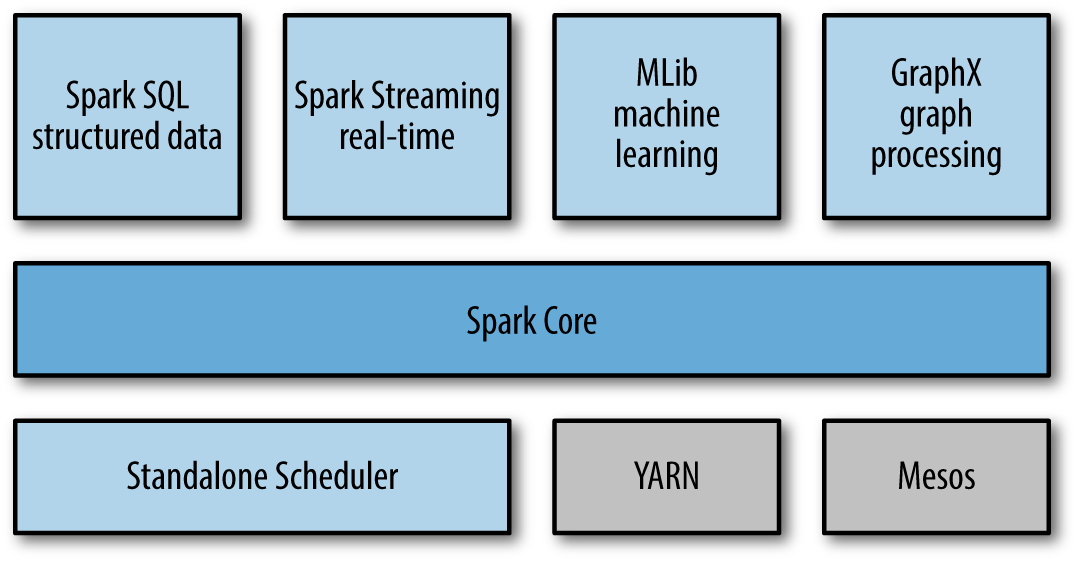

In [4]:
Image("pics/spark_stack.png", width=600)

## Brief history
2009 - research project UC Berkeley AMPLab

2010 - open sourced

2011 - higher-level components: Shark, Spark Streaming

2013 - transfer to Apache Software Foundation

2013 - Databricks

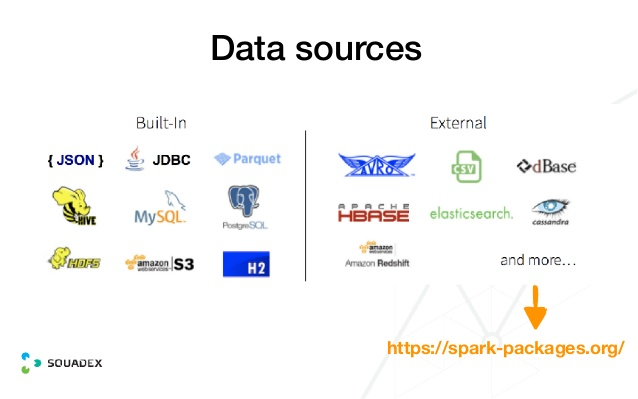

In [5]:
Image("pics/spark_data_sources.jpg", width=800)

## Starting PySpark

In [1]:
import os
import sys
os.environ["PYSPARK_SUBMIT_ARGS"]='--packages com.databricks:spark-csv_2.10:1.2.0 pyspark-shell --num-executors 5'
os.environ["PYSPARK_PYTHON"]='python3'
#os.environ["SPARK_HOME"]='/usr/hdp/current/spark2-client'

spark_home = os.environ.get('SPARK_HOME', None)
if not spark_home:
    raise ValueError('SPARK_HOME environment variable is not set')
sys.path.insert(0, os.path.join(spark_home, 'python'))
sys.path.insert(0, os.path.join(spark_home, 'python/lib/py4j-0.10.6-src.zip'))
os.environ["PYSPARK_PYTHON"] = 'python3'
exec(open(os.path.join(spark_home, 'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.0
      /_/

Using Python version 3.6.4 (default, Jan 16 2018 18:10:19)
SparkSession available as 'spark'.


## Another way to start
```bash
% export PYSPARK_PYTHON=python3
% export PYSPARK_DRIVER_PYTHON=jupyter
% export PYSPARK_DRIVER_PYTHON_OPTIONS='notebook --ip="*" --no-browser'
% pyspark
```

In [7]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

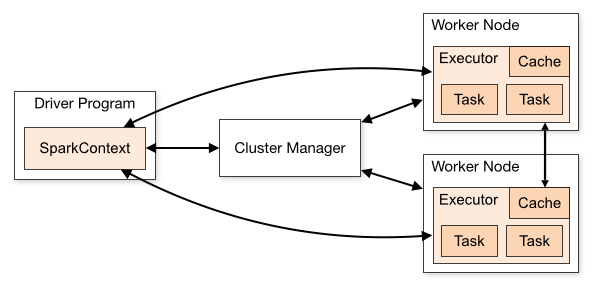

In [8]:
Image("pics/cluster-overview.png", width=800)

In [9]:
sc.getConf().getAll()

[('spark.driver.host', 'Ubuntu-1710-artful-64-minimal'),
 ('spark.driver.port', '44921'),
 ('spark.app.id', 'local-1525766698925'),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.jars',
  'file:///home/parser/.ivy2/jars/com.databricks_spark-csv_2.10-1.2.0.jar,file:///home/parser/.ivy2/jars/org.apache.commons_commons-csv-1.1.jar,file:///home/parser/.ivy2/jars/com.univocity_univocity-parsers-1.5.1.jar'),
 ('spark.files',
  'file:///home/parser/.ivy2/jars/com.databricks_spark-csv_2.10-1.2.0.jar,file:///home/parser/.ivy2/jars/org.apache.commons_commons-csv-1.1.jar,file:///home/parser/.ivy2/jars/com.univocity_univocity-parsers-1.5.1.jar'),
 ('spark.sql.catalogImplementation', 'hive'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.deployMode', 'client'),
 ('spark.submit.pyFiles',
  '/home/parser/.ivy2/jars/com.databricks_spark-csv_2.10-1.2.0.jar,/home/parser/.ivy2/jars/org.apac

## RDD. Resilient Distributed Dataset
RDD is an immutable collection of objects. It is split into multiple partitions, which may be computed on different nodes of the cluster.

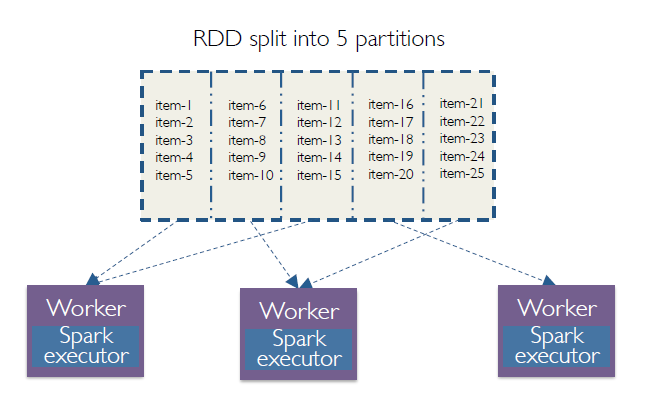

In [10]:
Image("pics/rdd_partitions.png", width=800)

## Users create RDDs in two ways:
+ by loading an external dataset
+ by distributing collection of objects in their driver

In [2]:
rdd = sc.parallelize(range(1000))

In [3]:
rdd

PythonRDD[1] at RDD at PythonRDD.scala:48

In [4]:
rdd.getNumPartitions()

8

In [14]:
!ls data

ips.txt  log.parquet


In [17]:
rdd2 = sc.textFile("data/ips.txt", minPartitions=5)

In [18]:
rdd2.getNumPartitions()

5

## RDD operations
There are two types of operations in Spark:
+ Transformations
+ Actions

**Transformations** convert RDD to another RDD and does not trigger a computation

In [29]:
sampled_rdd = rdd.sample(withReplacement=False, fraction=0.1)

In [30]:
sampled_rdd is rdd

False

**Actions** trigger a computation and return result to the driver or write data to an external storage system

In [31]:
sampled_rdd.count()

113

In [32]:
rdd2.take(10)

['192.168.0.1\tCHINA',
 '192.168.0.2\tCHINA',
 '192.168.0.3\tCHINA',
 '192.168.0.4\tCHINA',
 '192.168.0.5\tCHINA',
 '192.168.0.6\tCHINA',
 '192.168.0.7\tCHINA',
 '192.168.0.8\tCHINA',
 '192.168.0.9\tCHINA',
 '192.168.0.10\tCHINA']

## Why do you need both types? Lineage graph!

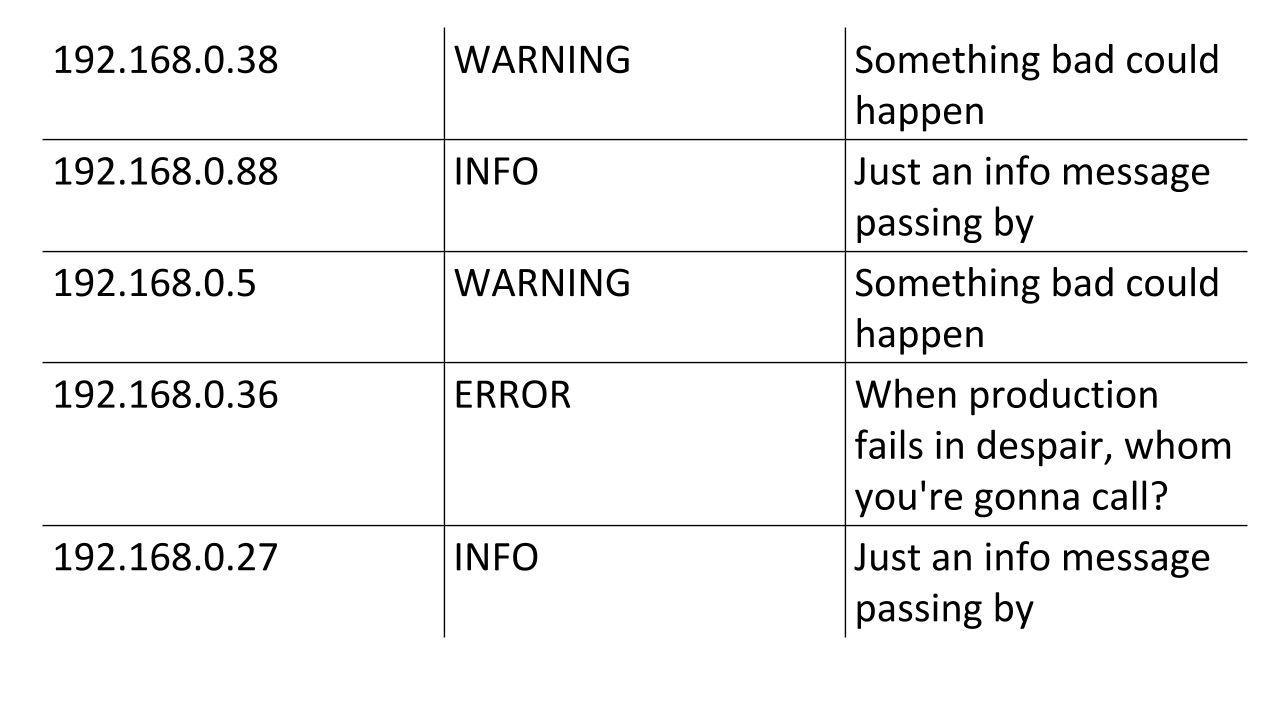

In [34]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx.png", width=800)

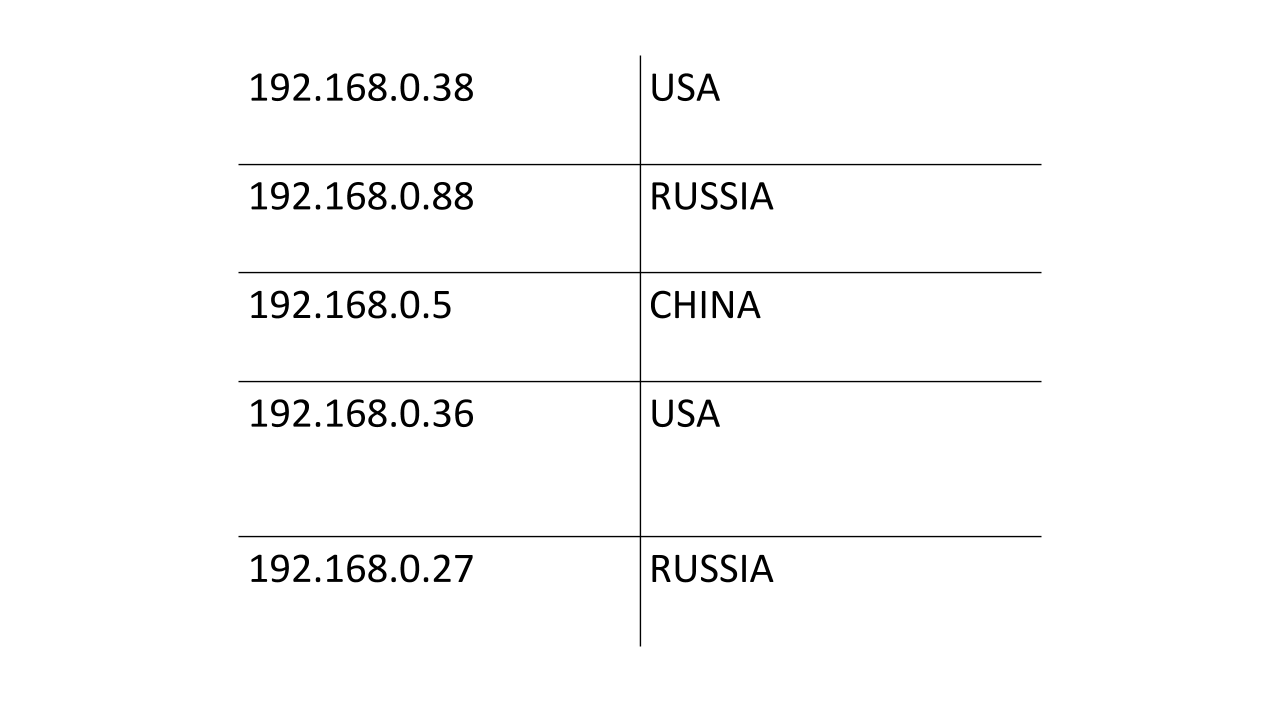

In [36]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx (1).png", width=800)

In [9]:
logs = sc.textFile("data/log.txt")\
         .filter(lambda x: "INFO" not in x)\
         .map(lambda x: (x.split("\t")[1], 1))\
         .reduceByKey(lambda x, y: x + y)

In [40]:
logs.collect()

[('ERROR', 49948), ('WARNING', 250004)]

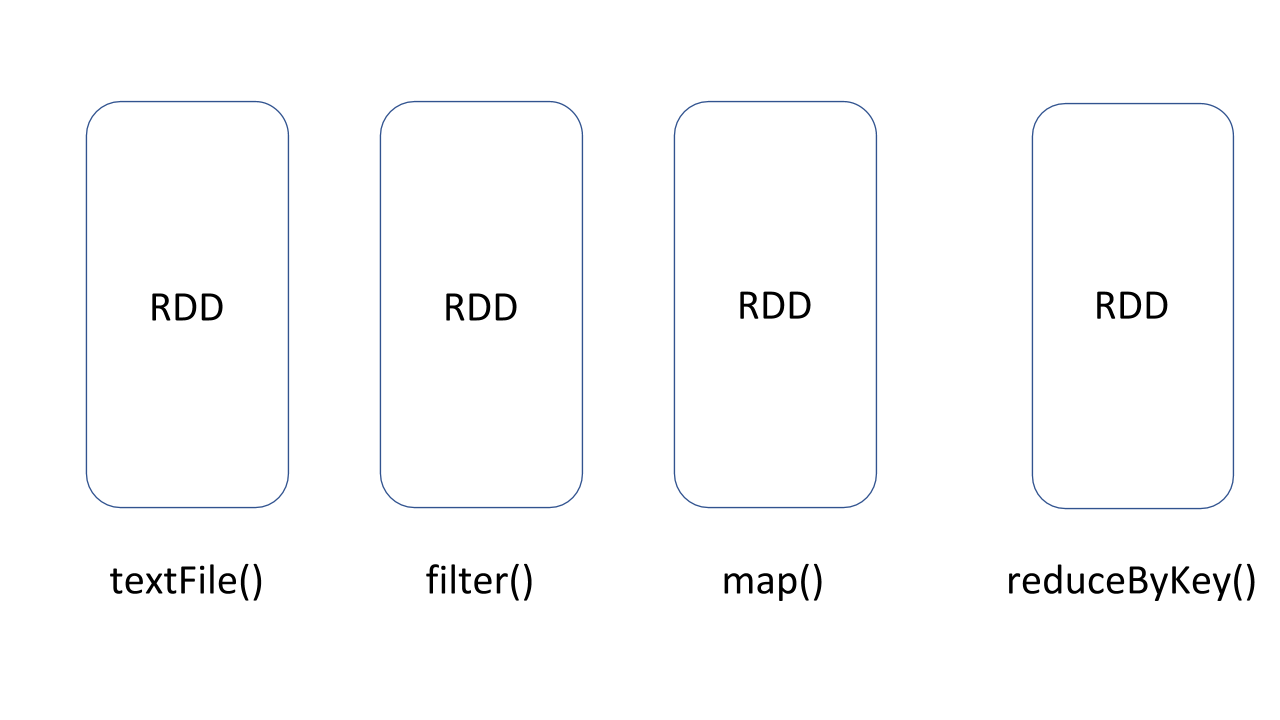

In [37]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx (2).png", width=800)

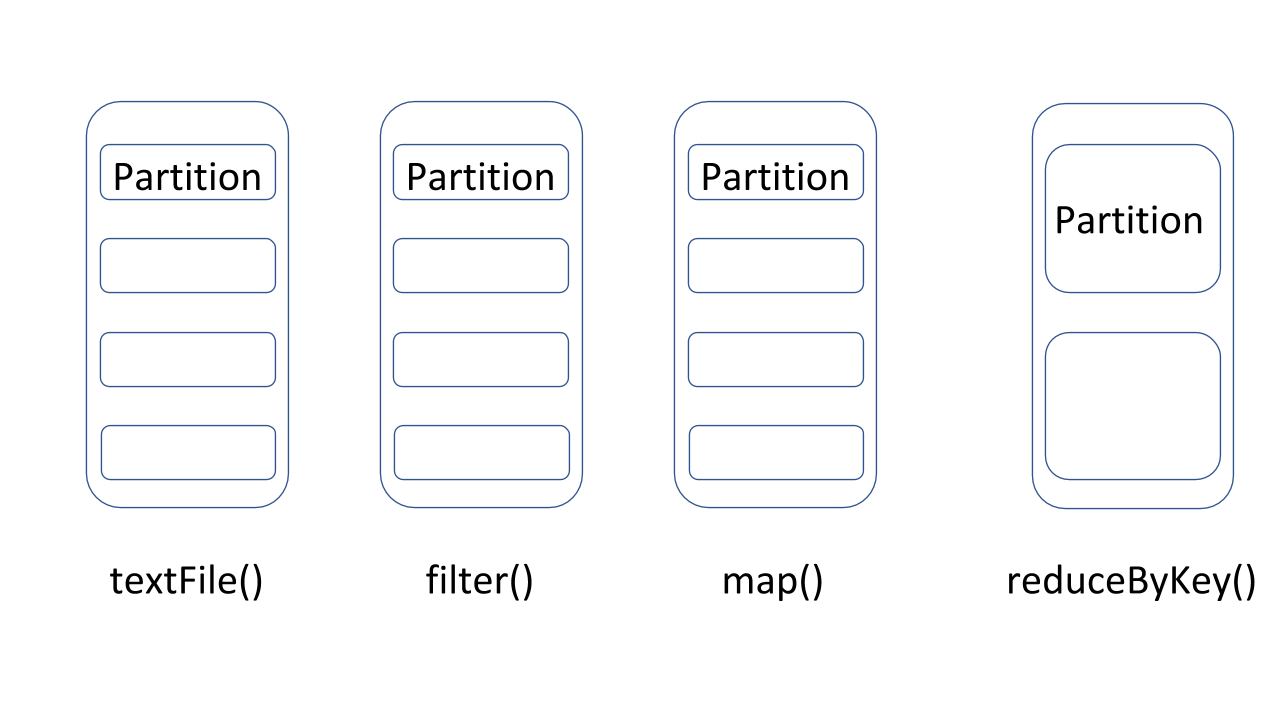

In [41]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx (3).png", width=800)

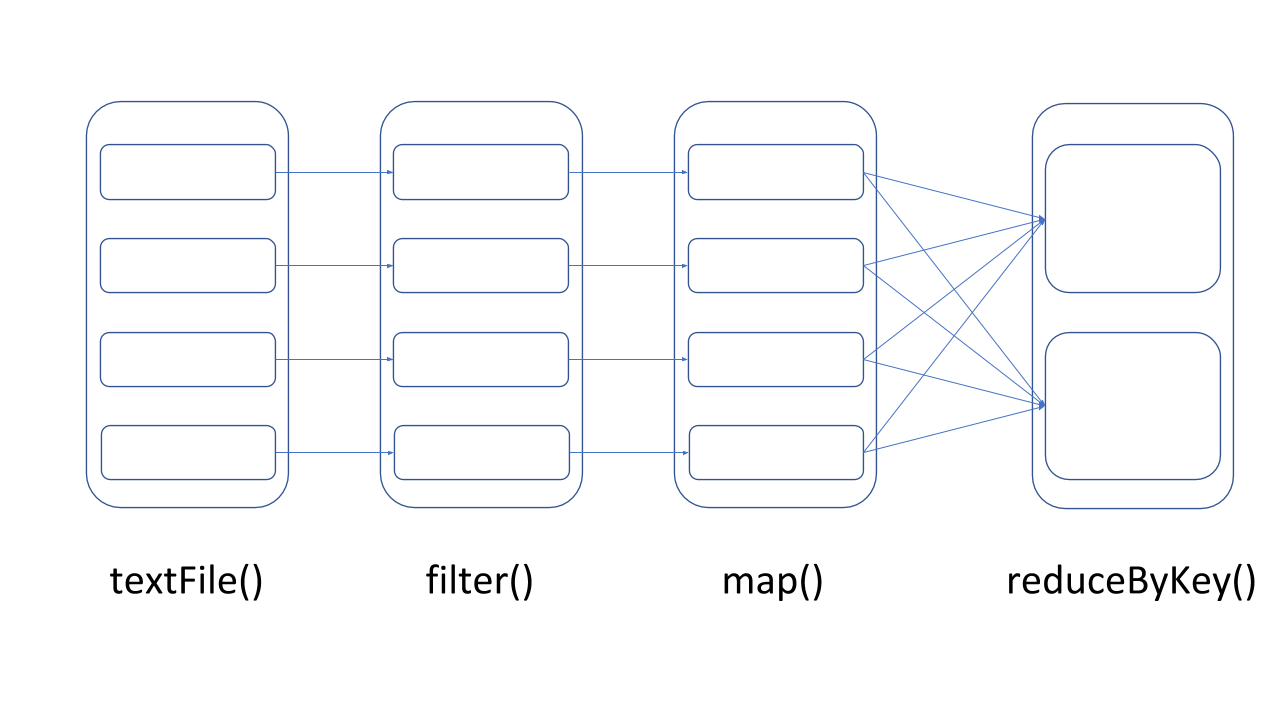

In [42]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx (4).png", width=800)

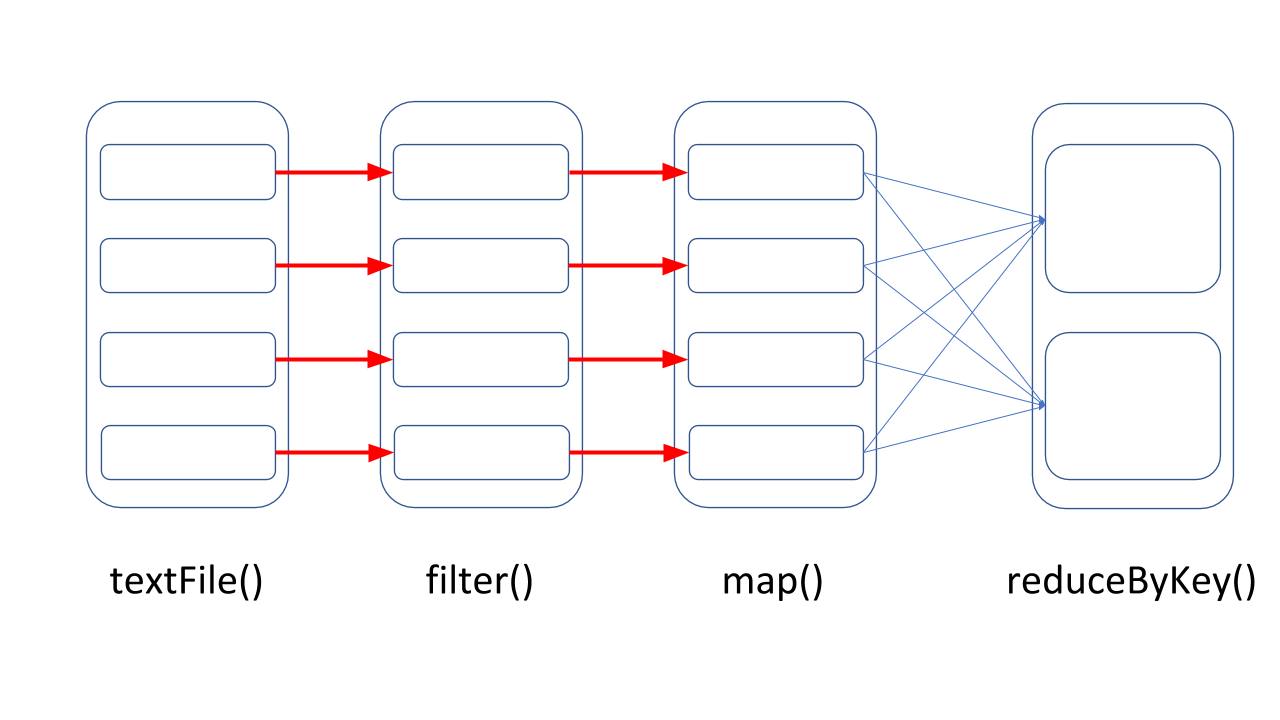

In [43]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx (5).png", width=800)

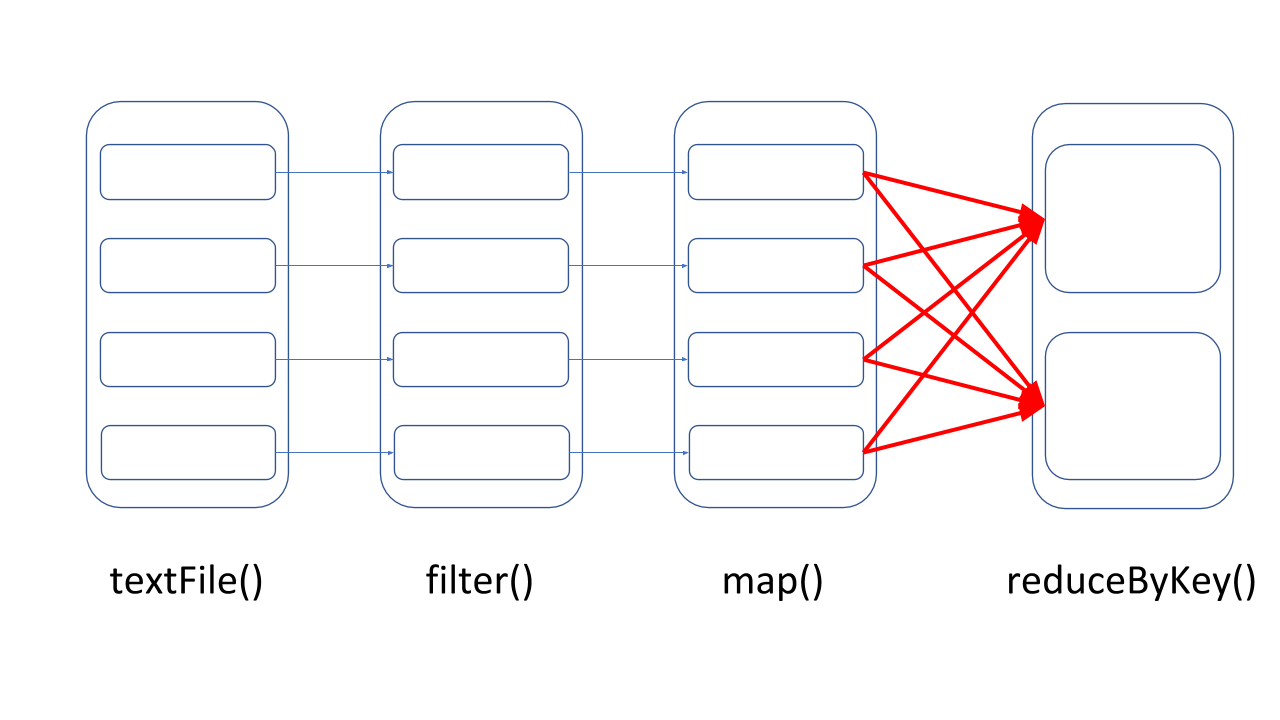

In [44]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx (6).png", width=800)

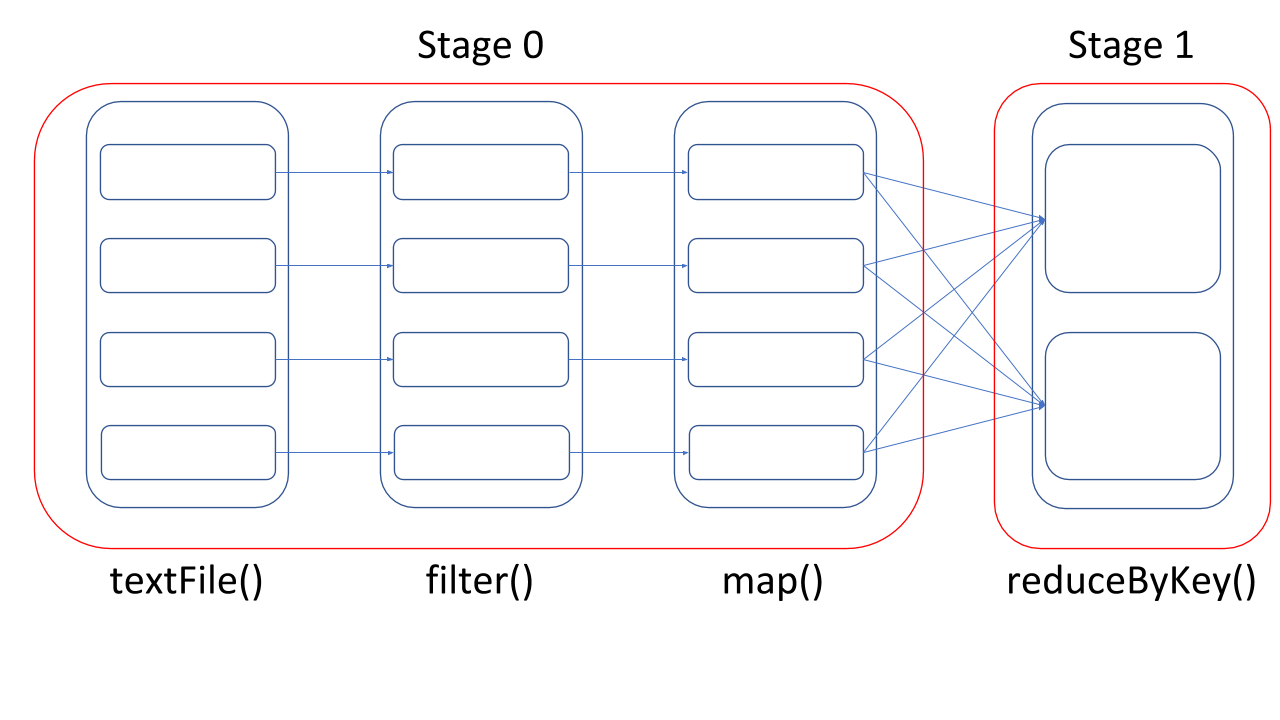

In [45]:
Image("pics/slides/lesson01_01_spark_execution_model.pptx (7).png", width=800)

|Narrow (usually) transformations|Wide (usually) transformations|
|---|---|
|map|cogroup|
|mapValues|groupWith|
|flatMap|join|
|filter|groupByKey|
|mapPartitions|reduceByKey|
|mapPartitionsWithIndex|combineByKey|
||distinct|
||intersection|
||repartition|
||coalesce|

## The first reason you should not use RDD in Python

In [51]:
print(logs.toDebugString().decode())

(4) PythonRDD[22] at collect at <ipython-input-40-fbcab01cbb93>:1 []
 |  MapPartitionsRDD[21] at mapPartitions at PythonRDD.scala:122 []
 |  ShuffledRDD[20] at partitionBy at NativeMethodAccessorImpl.java:0 []
 +-(4) PairwiseRDD[19] at reduceByKey at <ipython-input-39-fa0b5e2d1b4b>:1 []
    |  PythonRDD[18] at reduceByKey at <ipython-input-39-fa0b5e2d1b4b>:1 []
    |  data/log.txt MapPartitionsRDD[17] at textFile at NativeMethodAccessorImpl.java:0 []
    |  data/log.txt HadoopRDD[16] at textFile at NativeMethodAccessorImpl.java:0 []


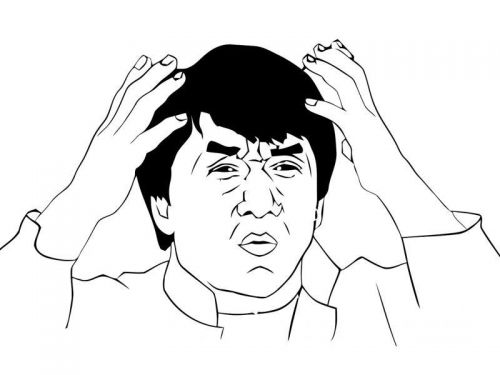

In [53]:
Image("pics/Jackie-Chan-WTF.jpg", width=500)

## Persistance and caching
Spark RDDs are lazily evaluated, and sometimes we may wish to use the same RDD multiple times. If we do this naively, Spark will recompute the RDD and all of its dependencies each time we call an action on the RDD.

In [54]:
logs.collect()

[('ERROR', 49948), ('WARNING', 250004)]

In [55]:
logs.count()

2

## To fix this you can cache RDD

In [59]:
logs.cache()

PythonRDD[22] at collect at <ipython-input-40-fbcab01cbb93>:1

In [60]:
logs.collect()

[('ERROR', 49948), ('WARNING', 250004)]

In [61]:
logs.count()

2

In [62]:
logs.unpersist()

PythonRDD[22] at collect at <ipython-input-40-fbcab01cbb93>:1

## `cache()` persists RDD in memory. You can use `persist(storage_level)` for fine grained control:
+ MEMORY_ONLY
+ MEMORY_AND_DISK
+ MEMORY_ONLY_SER (Java and Scala)
+ MEMORY_AND_DISK_SER (Java and Scala)
+ DISK_ONLY
+ MEMORY_ONLY_2
+ MEMORY_AND_DISK_2
+ OFF_HEAP (experimental)

In [63]:
from pyspark import StorageLevel

In [64]:
logs.persist(StorageLevel.DISK_ONLY)

PythonRDD[22] at collect at <ipython-input-40-fbcab01cbb93>:1

In [65]:
logs.collect()

[('ERROR', 49948), ('WARNING', 250004)]

In [66]:
logs.count()

2

## Other useful transformations

In [5]:
rdd.top(5)

[999, 998, 997, 996, 995]

In [6]:
rdd.top(5, lambda x: -x)

[0, 1, 2, 3, 4]

In [7]:
rdd.countByValue()

defaultdict(int,
            {0: 1,
             1: 1,
             2: 1,
             3: 1,
             4: 1,
             5: 1,
             6: 1,
             7: 1,
             8: 1,
             9: 1,
             10: 1,
             11: 1,
             12: 1,
             13: 1,
             14: 1,
             15: 1,
             16: 1,
             17: 1,
             18: 1,
             19: 1,
             20: 1,
             21: 1,
             22: 1,
             23: 1,
             24: 1,
             25: 1,
             26: 1,
             27: 1,
             28: 1,
             29: 1,
             30: 1,
             31: 1,
             32: 1,
             33: 1,
             34: 1,
             35: 1,
             36: 1,
             37: 1,
             38: 1,
             39: 1,
             40: 1,
             41: 1,
             42: 1,
             43: 1,
             44: 1,
             45: 1,
             46: 1,
             47: 1,
             48: 1,
             

In [29]:
raw_logs = sc.textFile("data/log.txt")

In [12]:
raw_logs.take(5)

['192.168.0.10\tERROR\tWhen production fails in dipsair, whom you gonna call?',
 '192.168.0.39\tINFO\tJust an info message passing by',
 '192.168.0.35\tINFO\tJust an info message passing by',
 '192.168.0.19\tINFO\tJust an info message passing by',
 '192.168.0.23\tERROR\tWhen production fails in dipsair, whom you gonna call?']

In [20]:
messages = raw_logs.map(lambda x: x.split("\t")[2]).cache()

In [21]:
messages.take(5)

['When production fails in dipsair, whom you gonna call?',
 'Just an info message passing by',
 'Just an info message passing by',
 'Just an info message passing by',
 'When production fails in dipsair, whom you gonna call?']

In [25]:
messages.map(lambda x: x.split()).take(5)

[['When',
  'production',
  'fails',
  'in',
  'dipsair,',
  'whom',
  'you',
  'gonna',
  'call?'],
 ['Just', 'an', 'info', 'message', 'passing', 'by'],
 ['Just', 'an', 'info', 'message', 'passing', 'by'],
 ['Just', 'an', 'info', 'message', 'passing', 'by'],
 ['When',
  'production',
  'fails',
  'in',
  'dipsair,',
  'whom',
  'you',
  'gonna',
  'call?']]

In [28]:
messages.flatMap(lambda x: x.split()).take(15)

['When',
 'production',
 'fails',
 'in',
 'dipsair,',
 'whom',
 'you',
 'gonna',
 'call?',
 'Just',
 'an',
 'info',
 'message',
 'passing',
 'by']

## Be aware of the `collect()`!

In [30]:
raw_logs.count()

1000000

In [31]:
raw_logs_local = raw_logs.take(10)

In [33]:
raw_logs_local = raw_logs.collect()[10]

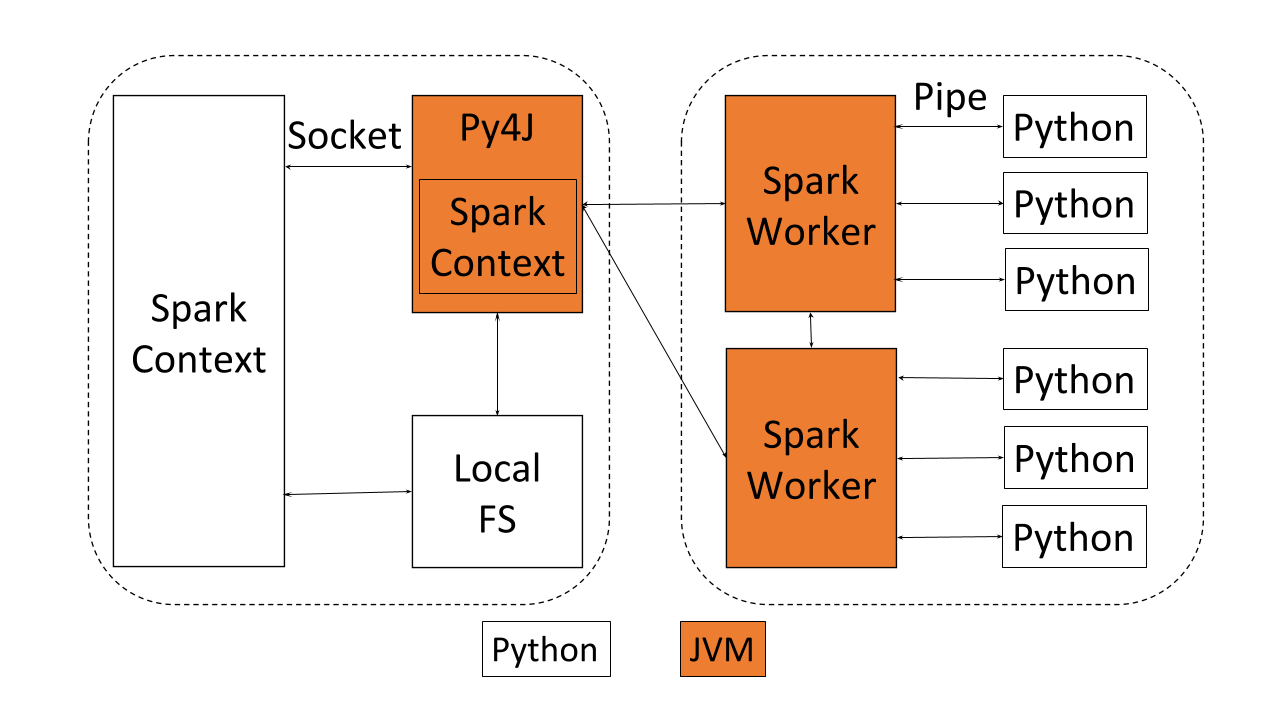

In [36]:
Image("pics/slides/lesson01_03_shuffle_serialization.pptx.png", width=800)

## Pair RDDs, joins and aggregation

In [50]:
raw_logs_cached = raw_logs.map(lambda x: x.split("\t")).cache()

In [51]:
raw_logs_cached.take(5)

[['192.168.0.10',
  'ERROR',
  'When production fails in dipsair, whom you gonna call?'],
 ['192.168.0.39', 'INFO', 'Just an info message passing by'],
 ['192.168.0.35', 'INFO', 'Just an info message passing by'],
 ['192.168.0.19', 'INFO', 'Just an info message passing by'],
 ['192.168.0.23',
  'ERROR',
  'When production fails in dipsair, whom you gonna call?']]

In [52]:
ips = sc.textFile("data/ips.txt").map(lambda x: x.split("\t"))

In [53]:
ips.take(5)

[['192.168.0.1', 'CHINA'],
 ['192.168.0.2', 'CHINA'],
 ['192.168.0.3', 'CHINA'],
 ['192.168.0.4', 'CHINA'],
 ['192.168.0.5', 'CHINA']]

In [54]:
raw_logs_cached.join(ips).take(5)

[('192.168.0.23', ('ERROR', 'CHINA')),
 ('192.168.0.23', ('INFO', 'CHINA')),
 ('192.168.0.23', ('INFO', 'CHINA')),
 ('192.168.0.23', ('ERROR', 'CHINA')),
 ('192.168.0.23', ('INFO', 'CHINA'))]

In [ ]:
Image("pics/Jackie-Chan-WTF.jpg", width=500)

In [55]:
def split_logs(line):
    split = line.split("\t")
    return split[0], split[1:]

In [56]:
raw_logs_cached = raw_logs.map(split_logs).cache()

In [57]:
raw_logs_cached.take(5)

[('192.168.0.10',
  ['ERROR', 'When production fails in dipsair, whom you gonna call?']),
 ('192.168.0.39', ['INFO', 'Just an info message passing by']),
 ('192.168.0.35', ['INFO', 'Just an info message passing by']),
 ('192.168.0.19', ['INFO', 'Just an info message passing by']),
 ('192.168.0.23',
  ['ERROR', 'When production fails in dipsair, whom you gonna call?'])]

## The second reason you should not use RDD (in Python)

In [58]:
raw_logs_cached.join(ips).take(5)

[('192.168.0.23',
  (['ERROR', 'When production fails in dipsair, whom you gonna call?'],
   'CHINA')),
 ('192.168.0.23', (['INFO', 'Just an info message passing by'], 'CHINA')),
 ('192.168.0.23', (['INFO', 'Just an info message passing by'], 'CHINA')),
 ('192.168.0.23',
  (['ERROR', 'When production fails in dipsair, whom you gonna call?'],
   'CHINA')),
 ('192.168.0.23', (['INFO', 'Just an info message passing by'], 'CHINA'))]

In [ ]:
Image("pics/facepalm.jpg", width=300)

## Data skew. `groupByKey()` vs `reduceByKey()`

In [65]:
raw_logs_cached.take(5)

[('192.168.0.10',
  ['ERROR', 'When production fails in dipsair, whom you gonna call?']),
 ('192.168.0.39', ['INFO', 'Just an info message passing by']),
 ('192.168.0.35', ['INFO', 'Just an info message passing by']),
 ('192.168.0.19', ['INFO', 'Just an info message passing by']),
 ('192.168.0.23',
  ['ERROR', 'When production fails in dipsair, whom you gonna call?'])]

In [76]:
raw_logs_cached.map(lambda x: (x[1][0], 1)).countByKey()

defaultdict(int, {'ERROR': 49948, 'INFO': 700048, 'WARNING': 250004})

## Parallelism

In [83]:
# Note, you should restart SparkContext with this new SparkConf
sc.getConf().set("spark.default.parallelism", 100)

In [79]:
raw_logs.getNumPartitions()

4

In [81]:
raw_logs.repartition(20).getNumPartitions()

20

In [82]:
raw_logs.coalesce(20).getNumPartitions()

4

## Broadcast

In [109]:
import re
from operator import add


def parseNeighbors(urls):
    """Parses a urls pair string into urls pair."""
    parts = re.split(r'\s+', urls)
    return parts[0], parts[1]

def computeContribs(urls, rank):
    """Calculates URL contributions to the rank of other URLs."""
    num_urls = len(urls)
    for url in urls:
        yield (url, rank / num_urls)

        
def pagerank(graph_file, iterations=5):

    lines = sc.textFile(graph_file)
    links = lines.map(parseNeighbors)\
                 .distinct()\
                 .groupByKey()\
                 .cache()
            
    ranks = links.map(lambda url_neighbors: (url_neighbors[0], 1.0))

    for iteration in range(iterations):
        contribs = links.join(ranks).flatMap(lambda u: computeContribs(u[1][0], u[1][1]))
        ranks = contribs.reduceByKey(add)\
                        .mapValues(lambda rank: rank * 0.85 + 0.15)

    return sorted(ranks.collect(), key=lambda x: x[1])

In [110]:
!cat data/links.txt

A	B
B	C
B	E
C	A
C	E
C	D
D	A
D	C
E	B


In [111]:
pagerank("data/links.txt")

[('D', 0.4548845717592592),
 ('A', 0.6412262644675925),
 ('C', 1.0514128993055554),
 ('E', 1.1699557783564813),
 ('B', 1.6825204861111107)]

## Berkeley-Stanford web graph
Nodes 685,230

Edges 7,600,595

In [112]:
pagerank("data/web-BerkStan.txt", iterations=2)

[('667003', 0.15059846574190835),
 ('667000', 0.15059846574190835),
 ('667001', 0.15059846574190835),
 ('667006', 0.15059846574190835),
 ('666996', 0.15059846574190835),
 ('667007', 0.15059846574190835),
 ('666995', 0.15059846574190835),
 ('666999', 0.15059846574190835),
 ('667002', 0.15059846574190835),
 ('666994', 0.15059846574190835),
 ('666997', 0.15059846574190835),
 ('666998', 0.15059846574190835),
 ('666993', 0.15059846574190835),
 ('667004', 0.15059846574190835),
 ('667005', 0.15059846574190835),
 ('372060', 0.15072890733056707),
 ('372195', 0.15072890733056707),
 ('372059', 0.15072890733056707),
 ('372182', 0.15072890733056707),
 ('372118', 0.15072890733056707),
 ('372057', 0.15072890733056707),
 ('372045', 0.15072890733056707),
 ('372201', 0.15072890733056707),
 ('372199', 0.15072890733056707),
 ('372198', 0.15072890733056707),
 ('372128', 0.15072890733056707),
 ('372147', 0.15072890733056707),
 ('372223', 0.15072890733056707),
 ('372054', 0.15072890733056707),
 ('372152', 0.

## Optimized version

In [ ]:
links = lines.map(parseNeighbors)\
             .distinct()\
             .groupByKey()\
             .partitionBy(2)\
             .cache()
                
ranks = links.map(lambda url_neighbors: (url_neighbors[0], 1.0)), preservePartitioning=True)

for iteration in range(n):
    contribs = links.join(ranks).flatMap(lambda u: computeContribs(u[1][0], u[1][1]))
    ranks = contribs.reduceByKey(add, numPartitions=links.getNumPartitions())\
                    .mapValues(lambda rank: rank * 0.85 + 0.15)

ranks.collect()

## Shortest path

In [86]:
def parse_edge(s):
    u, f = s.split("\t")
    return (int(u), int(f))

def step(i): 
    pv, pd, nv = i[0], i[1][0], i[1][1] 
    return (nv, pd + 1)

def complete(item): 
    v, od, nd = item[0], item[1][0], item[1][1]
    return (v, od if od is not None else nd)

def update_path(x):
    v, (old_path, (dist, new_v)) = x
    return new_v, old_path + (new_v,)

def shortest_path(v_from, v_to, dataset_path, numPartitions=10):
    edges = sc.textFile(dataset_path, numPartitions).map(parse_edge).cache()
    forward_edges = edges.map(lambda e: (e[1], e[0])).partitionBy(numPartitions).cache()
    
    d = 0
    distances = sc.parallelize([(v_from, d)]).partitionBy(numPartitions)
    paths = sc.parallelize([(v_from, (v_from,))])
    
    while True:
        candidates = distances.join(forward_edges, numPartitions).map(step)
        paths = paths.join(forward_edges, numPartitions).map(lambda x: (x[1][1], x[1][0] + (x[1][1],))).union(paths).distinct().cache()
        new_distances = distances.fullOuterJoin(candidates, numPartitions).map(complete).distinct().cache()
        count = new_distances.filter(lambda i: i[1] == d + 1).count()   
        if count > 0:
            d += 1     
            distances = new_distances
            # print "d = {}, count = {}".format(d, count)
        else:
            break
            
    result = paths.filter(lambda x: x[1][0] == v_from and x[1][-1] == v_to).collect()
    return ','.join(map(str, sorted(result, key=lambda x: len(x[1]))[0][1]))

In [ ]:
shortest_path(12, 34, "data/twitter_sample.txt") 